Iteration:     0, Loss: 0.69235106, Accuracy: 59.00%
Iteration:     1, Loss: 0.66446602, Accuracy: 64.00%
Iteration:     2, Loss: 0.65823187, Accuracy: 64.00%
Iteration:     3, Loss: 0.65664525, Accuracy: 64.00%
Iteration:     4, Loss: 0.65612069, Accuracy: 64.00%
Iteration:     5, Loss: 0.65585031, Accuracy: 64.00%
Iteration:     6, Loss: 0.65564265, Accuracy: 64.00%
Iteration:     7, Loss: 0.65545101, Accuracy: 64.00%
Iteration:     8, Loss: 0.65526385, Accuracy: 64.00%
Iteration:     9, Loss: 0.65507825, Accuracy: 64.00%
Iteration:    10, Loss: 0.65489349, Accuracy: 64.00%
Iteration:    11, Loss: 0.65470939, Accuracy: 64.00%
Iteration:    12, Loss: 0.65452587, Accuracy: 64.00%
Iteration:    13, Loss: 0.65434293, Accuracy: 64.00%
Iteration:    14, Loss: 0.65416055, Accuracy: 64.00%
Iteration:    15, Loss: 0.65397872, Accuracy: 64.00%
Iteration:    16, Loss: 0.65379743, Accuracy: 64.00%
Iteration:    17, Loss: 0.65361667, Accuracy: 64.00%
Iteration:    18, Loss: 0.65343644, Accuracy: 

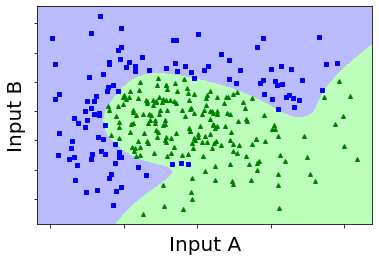

In [4]:
# Print the decision boundary of a neural network.

import numpy as np
import neural_network as nn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(123)  # Make this code deterministic

def one_hot_encode(Y):
    n_labels = Y.shape[0]
    result = np.zeros((n_labels, 2))
    for i in range(n_labels):
        result[i][Y[i]] = 1
    return result


# Uncomment one of the next three lines to decide which dataset to load
# x1, x2, y = np.loadtxt('linearly_separable.txt', skiprows=1, unpack=True)
x1, x2, y = np.loadtxt('non_linearly_separable.txt', skiprows=1, unpack=True)
# x1, x2, y = np.loadtxt('circles.txt', skiprows=1, unpack=True)

X_train = X_test = np.column_stack((x1, x2))
Y_train_unencoded = Y_test = y.astype(int).reshape(-1, 1)
Y_train = one_hot_encode(Y_train_unencoded)
w1, w2 = nn.train(X_train, Y_train,
                  X_test, Y_test,
                  n_hidden_nodes=10, iterations=100000, lr=0.3)


# Generate a mesh over one-dimensional data
# (The mesh() and plot_boundary() functionality were inspired by the
# documentation of the BSD-licensed scikit-learn library.)
def mesh(values):
    range = values.max() - values.min()
    padding_percent = 5
    padding = range * padding_percent * 0.01
    resolution = 1000
    interval = (range + 2 * range * padding) / resolution
    return np.arange(values.min() - padding, values.max() + padding, interval)


def plot_boundary(points, w1, w2):
    print("Calculating boundary...")
    # Generate a grid of points over the data
    x_mesh = mesh(points[:, 0])
    y_mesh = mesh(points[:, 1])
    grid_x, grid_y = np.meshgrid(x_mesh, y_mesh)
    grid = np.c_[grid_x.ravel(), grid_y.ravel()]
    # Classify points in the grid
    classifications = nn.classify(grid, w1, w2).reshape(grid_x.shape)
    # Trace the decision boundary
    BLUE_AND_GREEN = ListedColormap(['#BBBBFF', '#BBFFBB'])
    plt.contourf(grid_x, grid_y, classifications, cmap=BLUE_AND_GREEN)


def plot_data_by_label(input_variables, labels, label_selector, symbol):
    points = input_variables[(labels == label_selector).flatten()]
    plt.plot(points[:, 0], points[:, 1], symbol, markersize=4)


plot_boundary(X_train, w1, w2)
plot_data_by_label(X_train, Y_train_unencoded, 0, 'bs')
plot_data_by_label(X_train, Y_train_unencoded, 1, 'g^')
plt.gca().axes.set_xlabel("Input A", fontsize=20)
plt.gca().axes.set_ylabel("Input B", fontsize=20)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


0 - Loss: 1.38629436111989057245, 50.00%
1 - Loss: 1.29274511217352139347, 100.00%
2 - Loss: 1.20866271434718486333, 100.00%
3 - Loss: 1.13302765816415784705, 100.00%
4 - Loss: 1.06489960137581718413, 100.00%
5 - Loss: 1.00342509385425948665, 100.00%
6 - Loss: 0.94783895257848982396, 100.00%
7 - Loss: 0.89746132731355676704, 100.00%
8 - Loss: 0.85169212448653142111, 100.00%
9 - Loss: 0.81000404117103352863, 100.00%
10 - Loss: 0.77193508429749002620, 100.00%
11 - Loss: 0.73708114568689864221, 100.00%
12 - Loss: 0.70508897594401676034, 100.00%
13 - Loss: 0.67564974027239144139, 100.00%
14 - Loss: 0.64849323274665815475, 100.00%
15 - Loss: 0.62338275848355007014, 100.00%
16 - Loss: 0.60011065367843396956, 100.00%
17 - Loss: 0.57849439251516687754, 100.00%
18 - Loss: 0.55837322090097263327, 100.00%
19 - Loss: 0.53960525522690239164, 100.00%
20 - Loss: 0.52206498682361091035, 100.00%
21 - Loss: 0.50564113746911631964, 100.00%
22 - Loss: 0.49023481695360193733, 100.00%
23 - Loss: 0.475757939

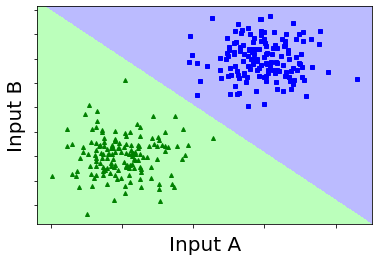

In [6]:
# Print the decision boundary of a perceptron.

import numpy as np
import perceptron
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)


def one_hot_encode(Y):
    n_labels = Y.shape[0]
    result = np.zeros((n_labels, 2))
    for i in range(n_labels):
        result[i][Y[i]] = 1
    return result


# Uncomment one of the next three lines to decide which dataset to load
x1, x2, y = np.loadtxt('linearly_separable.txt', skiprows=1, unpack=True)
# x1, x2, y = np.loadtxt('non_linearly_separable.txt', skiprows=1, unpack=True)
# x1, x2, y = np.loadtxt('circles.txt', skiprows=1, unpack=True)

X_train = X_test = prepend_bias(np.column_stack((x1, x2)))
Y_train_unencoded = Y_test = y.astype(int).reshape(-1, 1)
Y_train = one_hot_encode(Y_train_unencoded)
w = perceptron.train(X_train, Y_train,
                     X_test, Y_test,
                     iterations=10000, lr=0.1)


# Generate a mesh over one-dimensional data
# (The mesh() and plot_boundary() functionality were inspired by the
# documentation of the BSD-licensed scikit-learn library.)
def mesh(values):
    range = values.max() - values.min()
    padding_percent = 5
    padding = range * padding_percent * 0.01
    resolution = 1000
    interval = (range + 2 * range * padding) / resolution
    return np.arange(values.min() - padding, values.max() + padding, interval)


def plot_boundary(points, w):
    print("Calculating boundary...")
    # Generate a grid of points over the data
    x_mesh = mesh(points[:, 1])
    y_mesh = mesh(points[:, 2])
    grid_x, grid_y = np.meshgrid(x_mesh, y_mesh)
    grid = np.c_[grid_x.ravel(), grid_y.ravel()]
    # Classify points in the grid
    classifications = perceptron.classify(
                      prepend_bias(grid), w).reshape(grid_x.shape)
    # Trace the decision boundary
    BLUE_AND_GREEN = ListedColormap(['#BBBBFF', '#BBFFBB'])
    plt.contourf(grid_x, grid_y, classifications, cmap=BLUE_AND_GREEN)


def plot_data_by_label(input_variables, labels, label_selector, symbol):
    points = input_variables[(labels == label_selector).flatten()]
    plt.plot(points[:, 1], points[:, 2], symbol, markersize=4)


plot_boundary(X_train, w)
plot_data_by_label(X_train, Y_train_unencoded, 0, 'bs')
plot_data_by_label(X_train, Y_train_unencoded, 1, 'g^')
plt.gca().axes.set_xlabel("Input A", fontsize=20)
plt.gca().axes.set_ylabel("Input B", fontsize=20)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


In [7]:
# A three-layered neural network.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import echidna as data
import boundary

X_train = data.X_train
X_validation = data.X_validation
Y_train = to_categorical(data.Y_train)
Y_validation = to_categorical(data.Y_validation)

model = Sequential()
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          validation_data=(X_validation, Y_validation),
          epochs=30000, batch_size=25)

boundary.show(model, data.X_train, data.Y_train)


ImportError: cannot import name 'RMSprop' from 'keras.optimizers' (C:\Users\furyx\miniconda3\envs\tf27\lib\site-packages\keras\optimizers.py)